In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn tensorflow opencv-python

  Using cached flatbuffers-25.12.19-py2.py3-none-any.whl.metadata (1.0 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 3.9/332.0 MB 19.5 MB/s eta 0:00:17
    --------------------------------------- 6.6/332.0 MB 16.1 MB/s eta 0:00:21
   - -------------------------------------- 9.2/332.0 MB 14.9 MB/s eta 0:00:22
   - -------------------------------------- 11.8/332.0 MB 14.3 MB/s eta 0:00:23
   - -------------------------------------- 14.4/332.0 MB 14.0 MB/s eta 0:00:23
   -- ------------------------------------- 17.0/332.0 MB 13.7 MB/s eta 0:00:23
   -- ------------------------------------- 19.7/332.0 MB 13.6 MB/s eta 0:00:23
   -- ------------------------------------- 22.3/332.0 MB 13.5 MB/s eta 0:00:24
   --- ------------------------------------ 25.2/332.0 MB 13.4 MB/s eta 0:00:23
   --- ------------------------------------ 27.8/332.0 MB 13.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


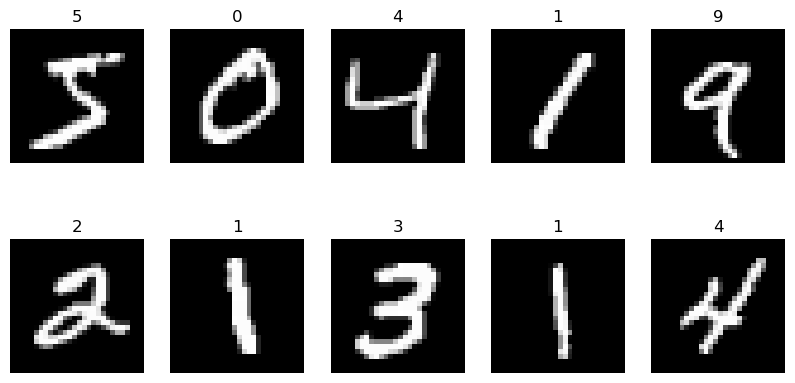

In [4]:
plt.figure(figsize=(10,5))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')

plt.show()

In [5]:
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

In [6]:
X_train_flat = X_train_norm.reshape(60000, 784)
X_test_flat = X_test_norm.reshape(10000, 784)

In [7]:
lr_model = LogisticRegression(max_iter=1000)

lr_model.fit(X_train_flat, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [8]:
lr_pred = lr_model.predict(X_test_flat)

lr_accuracy = accuracy_score(y_test, lr_pred)

print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.9261


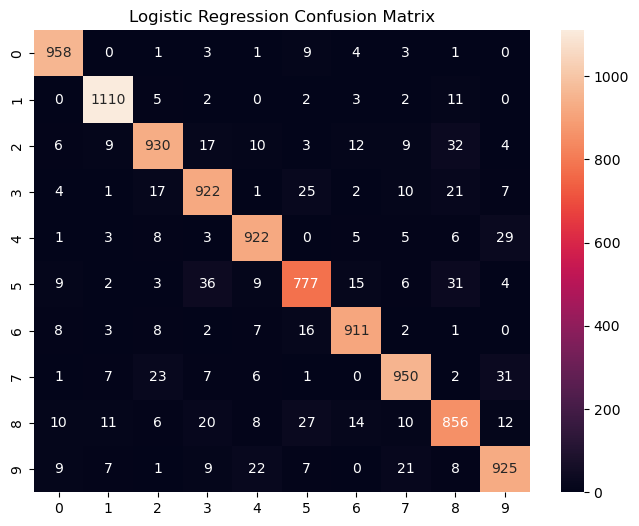

In [9]:
cm = confusion_matrix(y_test, lr_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [10]:
X_train_cnn = X_train_norm.reshape(-1,28,28,1)
X_test_cnn = X_test_norm.reshape(-1,28,28,1)

In [11]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [12]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
cnn_model.add(MaxPooling2D((2,2)))

cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D((2,2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

C:\Users\malva\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input

cnn_model = Sequential()

# FIX: use Input layer first
cnn_model.add(Input(shape=(28,28,1)))

cnn_model.add(Conv2D(32, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D((2,2)))

cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D((2,2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

In [14]:
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = cnn_model.fit(
    X_train_cnn,
    y_train_cat,
    epochs=5,
    validation_split=0.2
)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step - accuracy: 0.9556 - loss: 0.1457 - val_accuracy: 0.9856 - val_loss: 0.0515
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.9857 - loss: 0.0467 - val_accuracy: 0.9880 - val_loss: 0.0428
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9899 - loss: 0.0317 - val_accuracy: 0.9862 - val_loss: 0.0491
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9930 - loss: 0.0214 - val_accuracy: 0.9875 - val_loss: 0.0435
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9944 - loss: 0.0170 - val_accuracy: 0.9878 - val_loss: 0.0432


In [15]:
test_loss, test_accuracy = cnn_model.evaluate(X_test_cnn, y_test_cat)

print("CNN Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9892 - loss: 0.0344
CNN Accuracy: 0.9891999959945679


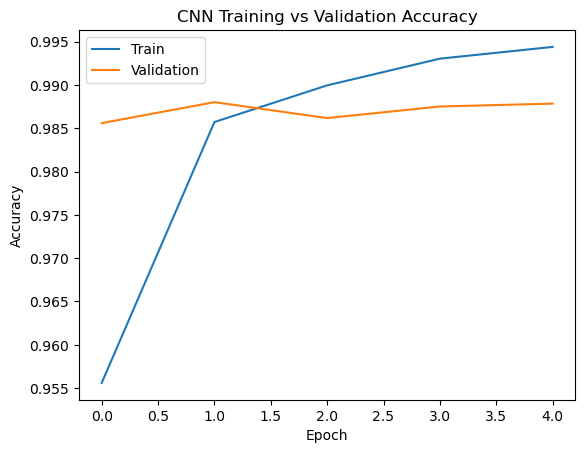

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title("CNN Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])

plt.savefig("../outputs/cnn_accuracy_graph.png")

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


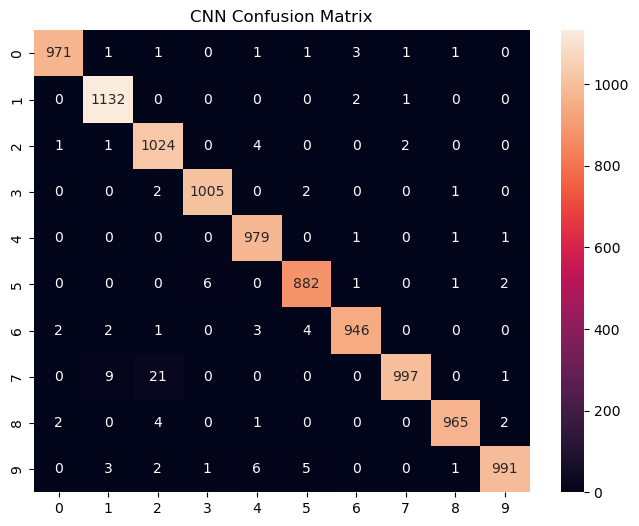

In [17]:
cnn_pred = cnn_model.predict(X_test_cnn)
cnn_pred_classes = np.argmax(cnn_pred, axis=1)

cm_cnn = confusion_matrix(y_test, cnn_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm_cnn, annot=True, fmt='d')
plt.title("CNN Confusion Matrix")

plt.savefig("../outputs/cnn_confusion_matrix.png")

plt.show()

In [18]:
print("Model Comparison")
print("------------------")
print("Logistic Regression Accuracy:", lr_accuracy)
print("CNN Accuracy:", test_accuracy)

Model Comparison
------------------
Logistic Regression Accuracy: 0.9261
CNN Accuracy: 0.9891999959945679


In [19]:
import joblib

joblib.dump(lr_model, "../models/logistic_regression.pkl")

cnn_model.save("../models/cnn_model.h5")

In [20]:
import joblib

# Save Logistic Regression
joblib.dump(lr_model, "../models/logistic_regression.pkl")

# Save CNN model (NEW FORMAT)
cnn_model.save("../models/cnn_model.keras")